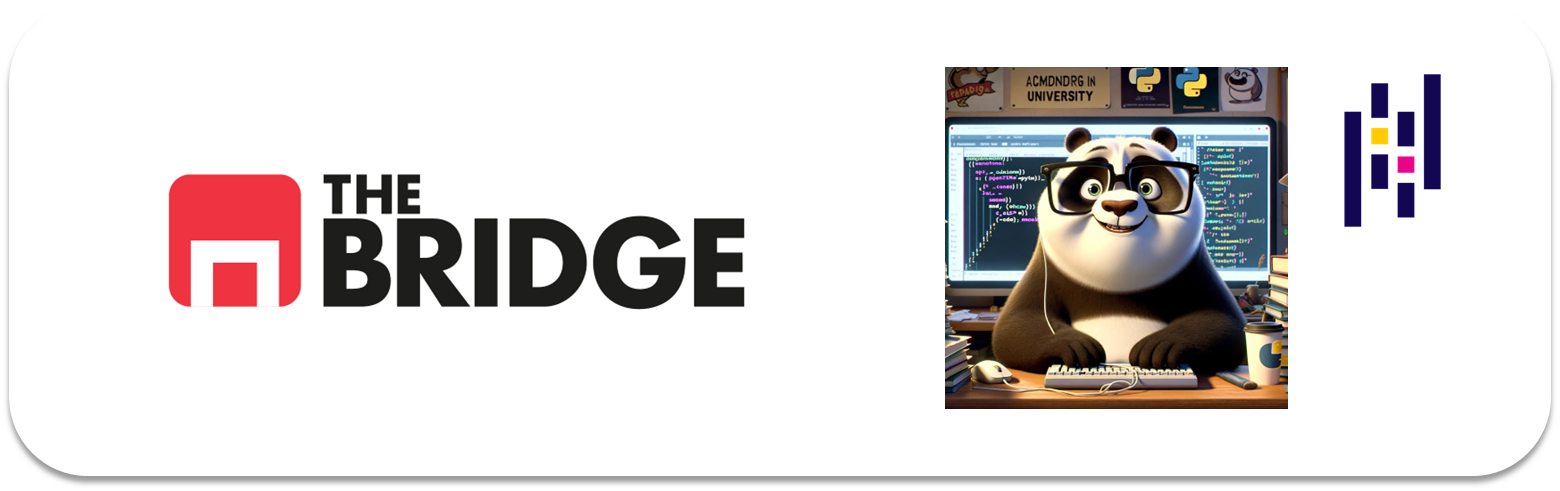

## PRACTICA OBLIGATORIA: Iniciación a Pandas

* La práctica obligatoria de esta unidad consiste en varios ejercicios de programación libre a completar. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

# #1 Series

Importa pandas y numpy de la forma que hemos visto hasta ahora:

In [34]:
import numpy as np
import pandas as pd

1. A partir de las listas siguientes, crea tres series que tengan como índices los títulos de las películas. Guárdalas cada una en una variable, que usarás a lo largo de la práctica.m

In [35]:

titulos = ["Toy Story 4", "Los Incríbles 2", "Buscando a Dory", "Toy Story 3", "Caco", "Inside Out", "Monsters University", "Up"]
lanzamiento = [2015, 2018, 2016, 2010, 2017, 2015, 2013, 2006]
recaudaciones = [1073, 1242, 1029, 1067, 807, 857, 744, 735]  # En millones de dólares
espectadores = [74.91, 93.42, 76.72, 81.35, 62.75, 68.27, 54.74, 54.34] # En millones, estimación hecha por aficionados


In [36]:
serie_lanzamiento = pd.Series(lanzamiento, index = titulos, name = "lanzamiento")
serie_recaudaciones = pd.Series(recaudaciones, index = titulos, name = "recaudaciones")
serie_espectadores = pd.Series(espectadores, index = titulos, name = "espectadores")

In [37]:
serie_lanzamiento

Toy Story 4            2015
Los Incríbles 2        2018
Buscando a Dory        2016
Toy Story 3            2010
Caco                   2017
Inside Out             2015
Monsters University    2013
Up                     2006
Name: lanzamiento, dtype: int64

2. El método sort_values() ordena de forma ascendente una serie. Pruébalo con la serie de recaudaciones. Busca el argumento que te permita hacer la ordenación en orden inverso y crea una nueva serie para las recaudaciones que esté ordenada de mayor recaudación a menor.

In [38]:
copia_profit = serie_recaudaciones.sort_values(ascending = False)
copia_profit

Los Incríbles 2        1242
Toy Story 4            1073
Toy Story 3            1067
Buscando a Dory        1029
Inside Out              857
Caco                    807
Monsters University     744
Up                      735
Name: recaudaciones, dtype: int64

In [39]:
serie_recaudaciones.sort_values(ascending = False, inplace= True)
serie_recaudaciones

Los Incríbles 2        1242
Toy Story 4            1073
Toy Story 3            1067
Buscando a Dory        1029
Inside Out              857
Caco                    807
Monsters University     744
Up                      735
Name: recaudaciones, dtype: int64

3. Utilizando la serie de recaudaciones obtenida en el apartado anterior, recorrela de forma que muestres para cada película su recaudación y ya de paso su año de lanzamiento y el número de espectadores. (Ojo el que corresponda de forma correcta, no te vale el índice de un enumerate por ejemplo, pero no lo necesitas, recuerda que las Series vienen con su índice explícito incorporado y todas las que hayas creado tienen el mismo). Muestra también el precio medio de la entrada que tuvo cada película.

In [40]:
for titulo,recaudacion in serie_recaudaciones.items():
    lanzamiento = serie_lanzamiento[titulo]
    espectadores = serie_espectadores[titulo]
    precio_entrada = round(recaudacion/espectadores,2)
    print(f"{titulo}: Es del {lanzamiento}, recaudó {recaudacion} millones, {espectadores} millones de espectadores, {precio_entrada}$ por entrada")


Los Incríbles 2: Es del 2018, recaudó 1242 millones, 93.42 millones de espectadores, 13.29$ por entrada
Toy Story 4: Es del 2015, recaudó 1073 millones, 74.91 millones de espectadores, 14.32$ por entrada
Toy Story 3: Es del 2010, recaudó 1067 millones, 81.35 millones de espectadores, 13.12$ por entrada
Buscando a Dory: Es del 2016, recaudó 1029 millones, 76.72 millones de espectadores, 13.41$ por entrada
Inside Out: Es del 2015, recaudó 857 millones, 68.27 millones de espectadores, 12.55$ por entrada
Caco: Es del 2017, recaudó 807 millones, 62.75 millones de espectadores, 12.86$ por entrada
Monsters University: Es del 2013, recaudó 744 millones, 54.74 millones de espectadores, 13.59$ por entrada
Up: Es del 2006, recaudó 735 millones, 54.34 millones de espectadores, 13.53$ por entrada


In [41]:
serie_precio_entrada = serie_recaudaciones/serie_espectadores

In [42]:
serie_precio_entrada

Buscando a Dory        13.412409
Caco                   12.860558
Inside Out             12.553098
Los Incríbles 2        13.294798
Monsters University    13.591524
Toy Story 3            13.116165
Toy Story 4            14.323855
Up                     13.525948
dtype: float64

4. Contesta:  (Usando código, of course)  
    4.1 ¿De que año es la película con menor recaudación?  
    4.2 ¿Cómo se llama la película con más de 1000 millones de recaudación y menos de 75 millones de espectadores?  
    4.3 Gonzalo tiene ahora 30 años, ¿con qué años fue a ver cada película, teniendo en cuenta que fue al estreno de todas?  

In [43]:
pelicula_menor_recaudacion = serie_recaudaciones.idxmin()
print(pelicula_menor_recaudacion)
anyo_menor = serie_lanzamiento.iloc[serie_recaudaciones.index.get_loc(pelicula_menor_recaudacion)]
print(f"{pelicula_menor_recaudacion} es la de menor recaudación y salió en {anyo_menor}")

Up
Up es la de menor recaudación y salió en 2006


In [44]:
filtro_pelicula = (serie_recaudaciones > 1000) & (serie_espectadores < 75)
print(filtro_pelicula)
nombre_pelicula = serie_recaudaciones[(serie_recaudaciones > 1000) & (serie_espectadores < 75)].idxmax()
print(nombre_pelicula)


Buscando a Dory        False
Caco                   False
Inside Out             False
Los Incríbles 2        False
Monsters University    False
Toy Story 3            False
Toy Story 4             True
Up                     False
dtype: bool
Toy Story 4


In [45]:
edad_gonzalo = 30
edad_gonzalo_en_estreno = edad_gonzalo - (2024 - serie_lanzamiento)
print(edad_gonzalo_en_estreno)

Toy Story 4            21
Los Incríbles 2        24
Buscando a Dory        22
Toy Story 3            16
Caco                   23
Inside Out             21
Monsters University    19
Up                     12
Name: lanzamiento, dtype: int64


5. Corrije los siguientes datos erróneos (pero no repitas los apartados anteriores) en las series (no en las listas iniciales) de forma que tus variables contengan los valores correctos:
* Toy Story 4 es de 2019  y Up de 2009
* La recaudación de Monsters University fue de 754 millones.
* Hay 2 nombres que han sufrido el efecto del conocido "error Jaime", corrígelo en todas las series (recuerda que los indices son inmutables, tendrás que hacer algo de código)


In [46]:
serie_lanzamiento["Toy Story 4"]  = 2019
serie_lanzamiento["Up"] = 2009
serie_recaudaciones["Monsters University"] = 754
titulos_corregidos = [titulo.replace("Caco","Coco").replace("Incríbles","Increíbles") for titulo in titulos]
serie_recaudaciones = pd.Series(recaudaciones, index = titulos_corregidos).sort_values(ascending = False)
serie_espectadores.index = titulos_corregidos
serie_lanzamiento.index = titulos_corregidos

In [47]:
serie_recaudaciones
serie_lanzamiento

Toy Story 4            2019
Los Increíbles 2       2018
Buscando a Dory        2016
Toy Story 3            2010
Coco                   2017
Inside Out             2015
Monsters University    2013
Up                     2009
Name: lanzamiento, dtype: int64

# #2 DataFrame

1. Crea un `DataFrame` con las series anteriores, ya corregidas, como columnas (usando la serie ordenada de recaudaciones) y que cómo indice de filas tenga las películas.

In [48]:
precio = round(serie_recaudaciones/serie_espectadores,2)
serie_4_pn = np.array(precio)
serie_4 = pd.DataFrame(serie_4_pn, columns = ["tickets"], index = titulos_corregidos)
serie_4


,tickets
Toy Story 4,13.41
Los Increíbles 2,12.86
Buscando a Dory,12.55
Toy Story 3,13.29
Coco,13.59
Inside Out,13.12
Monsters University,14.32
Up,13.53


In [49]:
data = { "lanzamiento": serie_lanzamiento, "recaudacion": serie_recaudaciones, "espectadores": serie_espectadores}
df = pd.DataFrame(data)
df

,lanzamiento,recaudacion,espectadores
Buscando a Dory,2016,1029,76.72
Coco,2017,807,62.75
Inside Out,2015,857,68.27
Los Increíbles 2,2018,1242,93.42
Monsters University,2013,744,54.74
Toy Story 3,2010,1067,81.35
Toy Story 4,2019,1073,74.91
Up,2009,735,54.34


2. Muestra los datos de las películas que tengan más de 10 años.

In [50]:
anyo_actual = 2024
antiguedad = 10
pelicula_10_anyo = df[df["lanzamiento"] < anyo_actual - antiguedad]
print(f"la pelicula con más de 10 años: {pelicula_10_anyo}")

la pelicula con más de 10 años:                      lanzamiento  recaudacion  espectadores
Monsters University         2013          744         54.74
Toy Story 3                 2010         1067         81.35
Up                          2009          735         54.34


In [51]:
df["lanzamiento"] < anyo_actual - antiguedad

Buscando a Dory        False
Coco                   False
Inside Out             False
Los Increíbles 2       False
Monsters University     True
Toy Story 3             True
Toy Story 4            False
Up                      True
Name: lanzamiento, dtype: bool

3. Muestra los datos de las películas que superen los 800 millones de recaudación y los 65 millones de espectadores.


In [52]:
peliculas_mas_65_mas_800 = df[(df["espectadores"] > 65) & (df["recaudacion"] > 800)]
peliculas_mas_65_mas_800

,lanzamiento,recaudacion,espectadores
Buscando a Dory,2016,1029,76.72
Inside Out,2015,857,68.27
Los Increíbles 2,2018,1242,93.42
Toy Story 3,2010,1067,81.35
Toy Story 4,2019,1073,74.91


4. Añade una columna "Ingreso_por_espectador" que contenga eso... el ingreso por espectador de cada película

In [53]:
df["Ingreso_por_espectador"] = df.recaudacion/df.espectadores

In [54]:
display(df)

,lanzamiento,recaudacion,espectadores,Ingreso_por_espectador
Buscando a Dory,2016,1029,76.72,13.412409
Coco,2017,807,62.75,12.860558
Inside Out,2015,857,68.27,12.553098
Los Increíbles 2,2018,1242,93.42,13.294798
Monsters University,2013,744,54.74,13.591524
Toy Story 3,2010,1067,81.35,13.116165
Toy Story 4,2019,1073,74.91,14.323855
Up,2009,735,54.34,13.525948


5. Igual que existe [`sort_values`](https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_values.html#pandas.Series.sort_values) para `Series`, existe [`sort_values`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values) para `DataFrame`, en el que además le puedes indicar más de una columna. Ordena el `DataFrame` para que muestre las películas ordenadas de forma ascendente por Año. Es decir que la variable que contenga el `DataFrame` termine teniendo el dataframe ordenado después de ejecutar el código.

In [55]:
df_sorted = df.sort_values(by = "lanzamiento")
df_sorted

,lanzamiento,recaudacion,espectadores,Ingreso_por_espectador
Up,2009,735,54.34,13.525948
Toy Story 3,2010,1067,81.35,13.116165
Monsters University,2013,744,54.74,13.591524
Inside Out,2015,857,68.27,12.553098
Buscando a Dory,2016,1029,76.72,13.412409
Coco,2017,807,62.75,12.860558
Los Increíbles 2,2018,1242,93.42,13.294798
Toy Story 4,2019,1073,74.91,14.323855


6. Ordena el `DataFrame` ahora para que quede ordenado de mayor a menor recaudación por espectador.

In [56]:
df_sorted.sort_values(by = "Ingreso_por_espectador", ascending = False)

,lanzamiento,recaudacion,espectadores,Ingreso_por_espectador
Toy Story 4,2019,1073,74.91,14.323855
Monsters University,2013,744,54.74,13.591524
Up,2009,735,54.34,13.525948
Buscando a Dory,2016,1029,76.72,13.412409
Los Increíbles 2,2018,1242,93.42,13.294798
Toy Story 3,2010,1067,81.35,13.116165
Coco,2017,807,62.75,12.860558
Inside Out,2015,857,68.27,12.553098


7. Deshaz las modificaciones del punto 5 de la parte #1

In [57]:
df_sorted.loc["Toy Story 4","lanzamiento"] = 2014
df_sorted.loc["Up","lanzamiento"] = 2006
df_sorted.loc["Monsters University","recaudacion"] = 744
df_sorted


,lanzamiento,recaudacion,espectadores,Ingreso_por_espectador
Up,2006,735,54.34,13.525948
Toy Story 3,2010,1067,81.35,13.116165
Monsters University,2013,744,54.74,13.591524
Inside Out,2015,857,68.27,12.553098
Buscando a Dory,2016,1029,76.72,13.412409
Coco,2017,807,62.75,12.860558
Los Increíbles 2,2018,1242,93.42,13.294798
Toy Story 4,2014,1073,74.91,14.323855


In [58]:
df_sorted.index = [indice.replace("Coco","Caco").replace("Increíbles","Incríbles") for indice in df_sorted.index]

In [59]:
df_sorted

,lanzamiento,recaudacion,espectadores,Ingreso_por_espectador
Up,2006,735,54.34,13.525948
Toy Story 3,2010,1067,81.35,13.116165
Monsters University,2013,744,54.74,13.591524
Inside Out,2015,857,68.27,12.553098
Buscando a Dory,2016,1029,76.72,13.412409
Caco,2017,807,62.75,12.860558
Los Incríbles 2,2018,1242,93.42,13.294798
Toy Story 4,2014,1073,74.91,14.323855


8. Finalmente, queremos que el título sea una columna más y no el índice, investiga el método [`set_index`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html) y el método [`reset_index`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) para que el título pase a ser una columna y el año el nombre de las filas (o índice del DataFrame)

In [60]:
df_sin_indice =  df.reset_index()
df_sin_indice.rename(columns = {"index": "Peliculas"})

,Peliculas,lanzamiento,recaudacion,espectadores,Ingreso_por_espectador
0,Buscando a Dory,2016,1029,76.72,13.412409
1,Coco,2017,807,62.75,12.860558
2,Inside Out,2015,857,68.27,12.553098
3,Los Increíbles 2,2018,1242,93.42,13.294798
4,Monsters University,2013,744,54.74,13.591524
5,Toy Story 3,2010,1067,81.35,13.116165
6,Toy Story 4,2019,1073,74.91,14.323855
7,Up,2009,735,54.34,13.525948


In [61]:
df_sin_indice

,index,lanzamiento,recaudacion,espectadores,Ingreso_por_espectador
0,Buscando a Dory,2016,1029,76.72,13.412409
1,Coco,2017,807,62.75,12.860558
2,Inside Out,2015,857,68.27,12.553098
3,Los Increíbles 2,2018,1242,93.42,13.294798
4,Monsters University,2013,744,54.74,13.591524
5,Toy Story 3,2010,1067,81.35,13.116165
6,Toy Story 4,2019,1073,74.91,14.323855
7,Up,2009,735,54.34,13.525948


In [62]:
df_sin_indice.columns = [col.replace("index","Peliculas") for col in df_sin_indice.columns]
df_sin_indice

,Peliculas,lanzamiento,recaudacion,espectadores,Ingreso_por_espectador
0,Buscando a Dory,2016,1029,76.72,13.412409
1,Coco,2017,807,62.75,12.860558
2,Inside Out,2015,857,68.27,12.553098
3,Los Increíbles 2,2018,1242,93.42,13.294798
4,Monsters University,2013,744,54.74,13.591524
5,Toy Story 3,2010,1067,81.35,13.116165
6,Toy Story 4,2019,1073,74.91,14.323855
7,Up,2009,735,54.34,13.525948


In [63]:
df_sin_indice.set_index("lanzamiento")

,Peliculas,recaudacion,espectadores,Ingreso_por_espectador
lanzamiento,,,,
2016,Buscando a Dory,1029,76.72,13.412409
2017,Coco,807,62.75,12.860558
2015,Inside Out,857,68.27,12.553098
2018,Los Increíbles 2,1242,93.42,13.294798
2013,Monsters University,744,54.74,13.591524
2010,Toy Story 3,1067,81.35,13.116165
2019,Toy Story 4,1073,74.91,14.323855
2009,Up,735,54.34,13.525948


In [64]:
print(serie_espectadores)
print("El importante", len("esto es una prueba"))

Toy Story 4            74.91
Los Increíbles 2       93.42
Buscando a Dory        76.72
Toy Story 3            81.35
Coco                   62.75
Inside Out             68.27
Monsters University    54.74
Up                     54.34
Name: espectadores, dtype: float64
El importante 18
